Author: Amalia Karalis

Date: 24/03/2022

Collaborators: Maude Lariviere, Ana Hoban

## 1.2

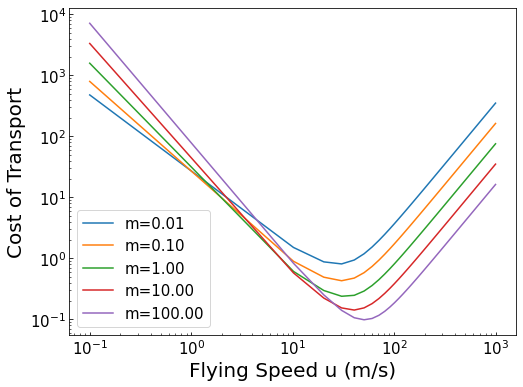

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def E_cost(u, m):
    # from the equation found in 1.1
    E_meta = 1.07*(10/u)*(0.035/m)**(1/4)
    E_drag_ind = 2.5e-2*(10/u)**2 * (m/0.035)**(1/3)
    E_drag_par = 2.3e-2*(u/10)**2 * (0.035/m)**(1/3)
    return E_meta + E_drag_ind + E_drag_ind + E_drag_par

u = np.linspace(0.1, 1000, 100) # define the velocities
masses = np.array([0.01, 0.1, 1, 10, 100]) # define the masses

# plot
plt.figure(figsize=(8,6))
for m in masses:
    plt.plot(u, E_cost(u, m), label='m=%1.2f'%m)
plt.legend(fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Flying Speed u (m/s)', fontsize=20)
plt.ylabel('Cost of Transport', fontsize=20) # unitless
plt.tick_params(labelsize=15, direction='in')
plt.tick_params(which='minor',labelsize=15, direction='in')
plt.show()

## 1.3

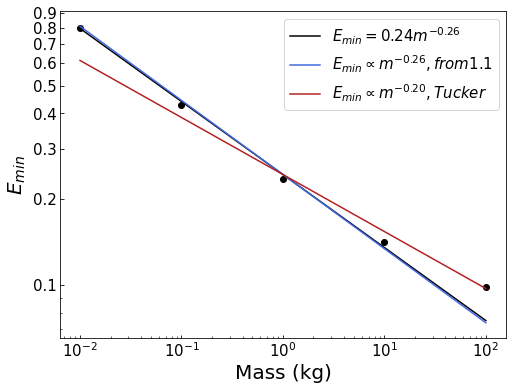

In [5]:
import scipy.optimize as sopt
from matplotlib.ticker import FormatStrFormatter

u_min = np.zeros(len(masses))
E_min = np.zeros(len(masses))
for i, m in enumerate(masses):
    min_u = sopt.minimize(E_cost, 10, args=(m)) # minimize the function in u
    u_min[i] = min_u.x
    E_min[i] = min_u.fun # E_min
    
def power_law(x, a, b):
    # define the power law
    return a*x**b

# fit the E_min vs mass data
popt, pcov = sopt.curve_fit(power_law, masses, E_min)
ms = np.linspace(0.01, 100, 100)

# plot
plt.figure(figsize=(8,6))
plt.plot(masses, E_min, 'ko')
plt.plot(ms, power_law(ms, popt[0], popt[1]), color='black', label = '$E_{min} = %1.2f m^{%1.2f}$' % (popt[0], popt[1]))
plt.plot(ms, power_law(ms, popt[0], -0.26), color='royalblue', label = '$E_{min} \propto m^{%1.2f}, from 1.1$' % (-0.26))
plt.plot(ms, power_law(ms, popt[0], -0.20), color='firebrick', label = '$E_{min} \propto m^{%1.2f}, Tucker$' % (-0.20))
plt.legend(fontsize=15)
plt.xlabel('Mass (kg)', fontsize=20)
plt.ylabel('$E_{min}$', fontsize=20) # unitless
plt.tick_params(labelsize=15, direction='in')
plt.tick_params(which='minor',labelsize=15, direction='in')
plt.xscale('log')
plt.yscale('log')
plt.yticks(ticks=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], labels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.show()

To measure the minimum E, we first use scipy.optimize.minimize to find the value of velocity that minimizes the function. We find values, one for each mass, and plug it into E_cost to get the minimum cost for each mass. The, we fit this E_min vs mass as a power-law relation using scipy.optimize.curve_fit.

With this methods, we find a power law coefficient of -0.26. In 1.1, we found -0.2778, which is very similar considering we neglected one of the terms. This value is also relatively close to what Tucker obtains, but there is a bit of a discrepancy with their answer. In the above plot, we can however see that using Tuckers -0.2, the power law fit is still ok.

At higher masses E_min gets smaller, which means that higher mass animals are more efficient at transporting themselves. The dominant term in the energy cost is the induced drag, so for large mass animals E_cost scales dominantly with 1/u^2.